<a href="https://colab.research.google.com/github/dderaad/math-for-ml/blob/master/curriculum-2/JNJ_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

###Introduction:
**Machine Learning** is an umbrella term for a wide variety of *supervised*, *unsupervised*, and *reinforcement* tasks where a computer synthesizes data to develop a model. Examples are regression, neural networks, decision trees, clustering methods, dimensionality reduction, etc.

**Supervised Machine Learning**, and specifically **Classification** requires at least some of the *data* to be composed of observations with a pre-defined *class*. Each observation must also have explanatory variables from which a  **classification** can be learned.

For example, we might want to predict a diagnosis for a patient based on a set of symptoms.

The goal of *classification* is to take an observation with unknown class (outcome) and assign its class. A **classifier** is any algorithm (*e.g.* regression, decision trees) which can learn a mapping from observation to class.

To continue our example, we have a dataset where we have patient covariate information (also called features or explanatory variables, such as age, height, sex, etc.) and symptoms they experienced. We also have a doctor's diagnosis based on these symptoms. We may use a decision tree to model the doctor's decisions and make predictions for patients that could not be seen by the doctor.

## Logistic Regression

The logistic regression typically models the probability of a class given an input. The most basic form of the logistic regression tries to make a binary choice, but also will model uncertainty (i.e. will output something in the range 0 to 1, not just 0 and 1). Here are some simple cases of image data where it may be difficult to distinguish the classes: ![](https://i.pinimg.com/originals/e3/bd/cb/e3bdcb19e8f72bf9392d935ba95092fa.jpg)

![](https://prods3.imgix.net/images/articles/2016_03/Facebook-Dog-or-Chicken-Labradoodle-or-fried-chicken-puppy-or-bagel-Karen-Zwack-teeny-biscuit-memes.jpg)

One simple form of the model is the following: say that $p=P($image is a dog | image data$)$. Then a linear model could be given by $l = log(\frac{p}{1-p}) = \beta_0 + \beta_1 x_1 + \cdots$, where the $x$s may be pixels of the image.

Unlike in the linear regression, we are trying to predict the probability of an outcome (class membership). As such, the $\beta$ coefficients signify the contribution to the probability. While a positive $\beta$ suggests that the pixel's intensity is related to the image being that of a dog, a negative $\beta$ means that the pixel is related to the image being a croissant. Their magnitudes are only indicative of their contribution to the likelihood of the outcome. Non-linear models (interaction terms!) could be used to characterize more complex relationships, as well as different choices for the link function.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

This is a dataset of 70,000 28x28 images, each flattened into a row. To make the flattened rows, each of the images is split into rows. Then the image rows are stacked horizontally. Thus, each column represents a specific pixel location of the original image.

$$I=
\overbrace{\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 & 0 & 0 \\
\vdots & & & & & & \vdots \\
0 & 0 & 0 & \cdots & 0 & 0 & 0
\end{bmatrix}}^{28 px}
\to \left.
\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 & 0 & 0 \\ \hline
\vdots & & & & & & \vdots \\ \hline
0 & 0 & 0 & \cdots & 0 & 0 & 0
\end{bmatrix}
\right\}28 px \to
\overbrace{\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 & 0 & 0 & | & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & | & \cdots
\end{bmatrix}}^{28^2 px}$$



In [2]:
mnist_data = datasets.fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
i = 1
mnist_data.data.iloc[i, :]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 1, Length: 784, dtype: float64

In [6]:
i = 1
print("Instance of data labeled '{}':\n".format(mnist_data.target[i]))
datumi = np.reshape(mnist_data.data.iloc[i, :].values, (28, 28))
for row in datumi:
    print('|', end='   ')
    for pixel in row:
        intensity = np.int64(pixel)
        print( intensity, end='{}'.format(' ' * (4 - len(str(intensity)))) )
    print('|')

Instance of data labeled '0':

|   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   |
|   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   |
|   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   |
|   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   |
|   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   51  159 253 159 50  0   0   0   0   0   0   0   0   |
|   0   0   0   0   0   0   0   0   0   0   0   0   0   0   48  238 252 252 252 237 0   0   0   0   0   0   0   0   |
|   0   0   0   0   0   0   0   0   0   0   0   0   0   54  227 253 252 239 233 252 57  6   0   0   0   0   0   0   |
|   0   0   0   0   0   0   0   0   0   0   0   10  60  224 252 253 252 202 84  252 253 122 0   0   0   0   0   0   |
|   0   0   0   0   0   0

In [7]:
def extract_image(data, i, dim=-1):
    extracted = []
    for j in i:
        extracted.append(np.reshape(data.iloc[j, :].values, dim))

    return extracted

def show_images(data, show):
    images = extract_image(data, show, (28, 28))
    fig, axes = plt.subplots(1, len(show), figsize=(200/len(show), 10))
    for i, ax in enumerate(axes):
        ax.matshow(-images[i], cmap=plt.cm.gray)
        ax.set_xticks(())
        ax.set_yticks(())

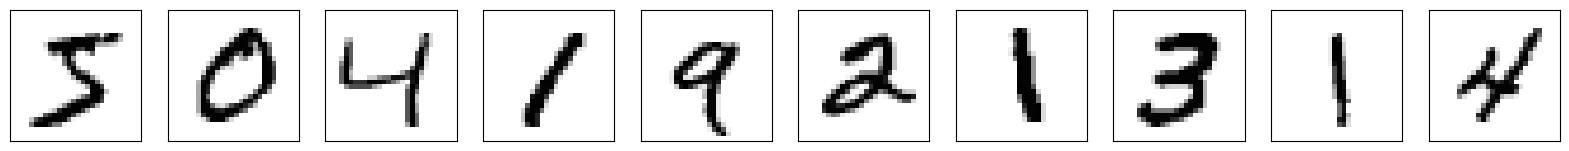

In [8]:
show_images(mnist_data.data, range(10))

In [9]:
X = mnist_data.data
y = mnist_data.target
y.head(10)

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, train_size=2000, random_state=0)
print(X_train.shape)
print(X_test.shape)

(2000, 784)
(100, 784)


In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [12]:
def output(model, _X_test, _y_test):
    print('Classes: {}'.format(model.classes_))

    with np.printoptions(precision=3, suppress=True):
      print(model.predict_proba(_X_test))

    print(".\n"*3)
    print('Score for test data: {:.2%}'.format(model.score(_X_test, _y_test)))

output(clf, X_test, y_test)

Classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
[[1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.997 0.    0.    0.003 0.    0.   ]
 [0.    0.    0.    0.    0.996 0.    0.    0.004 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.998 0.002 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.999 0.    0.    0.    0.001 0.    0.    0.   ]
 [0.

In [13]:
print(clf.coef_.shape)
print(clf.coef_) # from doc: coef_ corresponds to outcome 1 (True)
print(clf.intercept_)

(10, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[-2.81735115e-05  5.20796603e-05  7.72516771e-05 -8.87873705e-05
  3.42006939e-05  1.08967678e-04 -2.88475683e-05  6.96023218e-05
 -1.87149026e-04 -9.14455527e-06]


## Decision Trees

A decision tree is a structured way to make decisions by assigning probabilities to courses of action based on the outcomes of certain events.

We can imagine that every time we want to make a decision, several options are available to us.

![](https://i1.wp.com/www.samtalksml.net/wp-content/uploads/2017/05/image_dt1-1.png?resize=450%2C368&ssl=1)

![](http://www.prognoz.com/blog/wp-content/uploads/2016/06/tree.png)

![](https://victorzhou.com/media/random-forest-post/decision-tree2-root.svg)

## Random Forest

The problem with decision trees is their tendency to overfit. The fact that apples and grapes appear as leaf nodes multiple times is an example of this problem. For small decision trees, this harms interpretibility. For classification tasks, their generality is harmed when new  data is introduced.

Random Forest is a method of overcoming the overfitting problem. It creates classification trees which each only see a small portion of the training set, and may even only see a subset of its dimensions. By combining these trees, the variance is reduced significantly while slightly increasing the bias.

![](https://miro.medium.com/max/592/1*i0o8mjFfCn-uD79-F1Cqkw.png)

Random forest will only give importance of the features for classification, but has no analogy to the sign of the beta coefficients. Small magnitude importance means that features have little impact. These importance scores are also invariant to feature scaling.

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [15]:
output(rfc, X_test, y_test)

Classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
[[0.63 0.   0.03 0.01 0.08 0.02 0.15 0.   0.07 0.01]
 [0.   0.   0.01 0.01 0.86 0.05 0.01 0.01 0.   0.05]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.01]
 [0.09 0.01 0.57 0.06 0.01 0.09 0.06 0.04 0.06 0.01]
 [0.06 0.08 0.05 0.05 0.13 0.03 0.07 0.37 0.01 0.15]
 [0.06 0.01 0.08 0.09 0.21 0.03 0.07 0.13 0.02 0.3 ]
 [0.   0.   0.   0.01 0.   0.01 0.   0.98 0.   0.  ]
 [0.   0.95 0.   0.01 0.   0.02 0.   0.   0.02 0.  ]
 [0.   0.91 0.02 0.03 0.02 0.   0.01 0.   0.   0.01]
 [0.   0.02 0.03 0.11 0.01 0.07 0.   0.69 0.04 0.03]
 [0.   0.97 0.   0.01 0.01 0.   0.   0.   0.01 0.  ]
 [0.   0.   0.03 0.86 0.   0.07 0.   0.   0.04 0.  ]
 [0.   0.   0.01 0.01 0.79 0.04 0.   0.05 0.02 0.08]
 [0.02 0.   0.71 0.02 0.   0.02 0.   0.   0.23 0.  ]
 [0.01 0.02 0.09 0.06 0.36 0.12 0.15 0.03 0.09 0.07]
 [0.02 0.   0.01 0.04 0.74 0.01 0.03 0.04 0.05 0.06]
 [0.06 0.01 0.05 0.   0.06 0.04 0.73 0.01 0.01 0.03]
 [0.02 0.   0.2  0.02 0.02 0.01 0.02 0.58 0.07 0